In [2]:
%matplotlib inline
import numpy as np
import torch
from torch.utils.serialization import load_lua
import os
import scipy.io as sio
import cv2
import math
from matplotlib import pyplot as plt

from PIL import Image
import PIL

In [3]:
def plot_pose_cube(img, yaw, pitch, roll, tdx=None, tdy=None, size=150.):
    # Input is a cv2 image
    # pose_params: (pitch, yaw, roll, tdx, tdy)
    # Where (tdx, tdy) is the translation of the face.
    # For pose we have [pitch yaw roll tdx tdy tdz scale_factor]

    p = pitch * np.pi / 180
    y = -(yaw * np.pi / 180)
    r = roll * np.pi / 180

    if tdx != None and tdy != None:
        face_x = tdx - 0.50 * size
        face_y = tdy - 0.50 * size
    else:
        height, width = img.shape[:2]
        face_x = width / 2 - 0.5 * size
        face_y = height / 2 - 0.5 * size

    x1 = size * (cos(y) * cos(r)) + face_x
    y1 = size * (cos(p) * sin(r) + cos(r) * sin(p) * sin(y)) + face_y
    x2 = size * (-cos(y) * sin(r)) + face_x
    y2 = size * (cos(p) * cos(r) - sin(p) * sin(y) * sin(r)) + face_y
    x3 = size * (sin(y)) + face_x
    y3 = size * (-cos(y) * sin(p)) + face_y

    # Draw base in red
    cv2.line(img, (int(face_x), int(face_y)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(face_x), int(face_y)), (int(x2),int(y2)),(0,0,255),3)
    cv2.line(img, (int(x2), int(y2)), (int(x2+x1-face_x),int(y2+y1-face_y)),(0,0,255),3)
    cv2.line(img, (int(x1), int(y1)), (int(x1+x2-face_x),int(y1+y2-face_y)),(0,0,255),3)
    # Draw pillars in blue
    cv2.line(img, (int(face_x), int(face_y)), (int(x3),int(y3)),(255,0,0),2)
    cv2.line(img, (int(x1), int(y1)), (int(x1+x3-face_x),int(y1+y3-face_y)),(255,0,0),2)
    cv2.line(img, (int(x2), int(y2)), (int(x2+x3-face_x),int(y2+y3-face_y)),(255,0,0),2)
    cv2.line(img, (int(x2+x1-face_x),int(y2+y1-face_y)), (int(x3+x1+x2-2*face_x),int(y3+y2+y1-2*face_y)),(255,0,0),2)
    # Draw top in green
    cv2.line(img, (int(x3+x1-face_x),int(y3+y1-face_y)), (int(x3+x1+x2-2*face_x),int(y3+y2+y1-2*face_y)),(0,255,0),2)
    cv2.line(img, (int(x2+x3-face_x),int(y2+y3-face_y)), (int(x3+x1+x2-2*face_x),int(y3+y2+y1-2*face_y)),(0,255,0),2)
    cv2.line(img, (int(x3), int(y3)), (int(x3+x1-face_x),int(y3+y1-face_y)),(0,255,0),2)
    cv2.line(img, (int(x3), int(y3)), (int(x3+x2-face_x),int(y3+y2-face_y)),(0,255,0),2)

    return img

In [4]:
TRAIN_DATA_DIR = '/Data/nruiz9/data/facial_landmarks'
AFLW = os.path.join(TRAIN_DATA_DIR, 'AFLW2000')

In [5]:
img_name = 'image00559'
img_path = os.path.join(AFLW, img_name + '.jpg')
mat_path = os.path.join(AFLW, img_name + '.mat')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
mat = sio.loadmat(mat_path)

roi = mat['roi'][0]

#cv2.rectangle(img, (mat['Pose_Para'][0][3], mat['Pose_Para'][0][4]), (roi[0] + roi[2], roi[1] + roi[3]), (255,0,0),5)

# plt.imshow(img)
# plt.show()

31.4852903566 -8.4217829023 1.0273663191


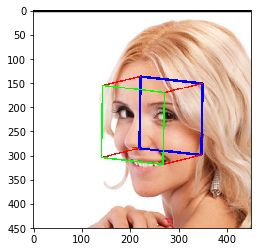

In [9]:
# For pose we have [pitch yaw roll tdx tdy tdz scale_factor]
from math import cos, sin

flip = False

img_name = 'image01131'
# img_name = 'image01149'
img_path = os.path.join(AFLW, img_name + '.jpg')
mat_path = os.path.join(AFLW, img_name + '.mat')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
rows, cols, depth = img.shape
mat = sio.loadmat(mat_path)

if flip == True:
    frame = cv2.flip(img, 1)
else:
    frame = img
pose_params = mat['Pose_Para'][0]

pitch, yaw, roll, tdx, tdy, tdz, scale = pose_params
pitch *= 180/np.pi
yaw *= 180/np.pi
roll *= 180/np.pi

size = 150

p = pitch
y = yaw
r = roll

if flip == True:
    y = -y
    r = -r

print y, p, r

plot_pose_cube(frame, y, p, r, tdx, tdy, size=150.)

# Draw bounding box

plt.imshow(frame)
plt.show()

31.4852903566 -8.4217829023 -18.9726336809


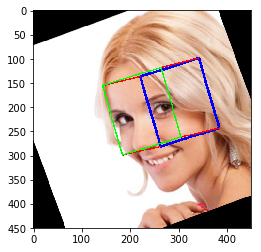

In [9]:
# An example of rotation with modification of labels.
from math import cos, sin

rotate = True

img_name = 'image01131'
# img_name = 'image01149'
img_path = os.path.join(AFLW, img_name + '.jpg')
mat_path = os.path.join(AFLW, img_name + '.mat')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
rows, cols, depth = img.shape
mat = sio.loadmat(mat_path)

if rotate == True:
    M = cv2.getRotationMatrix2D((cols/2,rows/2),20,1)
    frame = cv2.warpAffine(img,M,(cols,rows))
else:
    frame = img
pose_params = mat['Pose_Para'][0]

pitch, yaw, roll, tdx, tdy, tdz, scale = pose_params
pitch *= 180/np.pi
yaw *= 180/np.pi
roll *= 180/np.pi

size = 150

p = pitch
y = yaw
r = roll

if rotate == True:
    r = r - 20
    
print y, p, r

plot_pose_cube(frame, y, p, r, tdx, tdy, size=150.)

# Draw bounding box

plt.imshow(frame)
plt.show()